In [1]:
#Basic libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


C:\Users\keert\Anaconda3\envs\hopeai\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\keert\Anaconda3\envs\hopeai\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\keert\Anaconda3\envs\hopeai\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [5]:
(X_train_digit,Y_train_digit),(X_test_digit,Y_test_digit) = mnist.load_data()

In [7]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
col_names=['zero','one','two','three','four','five','six','seven','eight','nine']

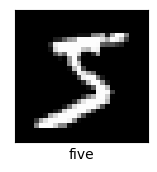

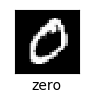

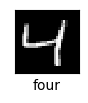

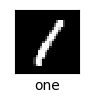

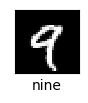

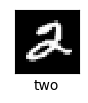

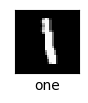

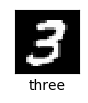

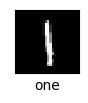

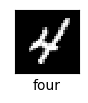

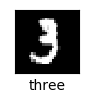

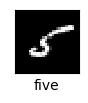

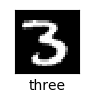

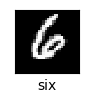

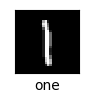

In [11]:
#visulaizing the digits
plt.figure(figsize=(10,10))
for i in range (15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[Y_train_digit[i]])
    plt.show()
    

In [12]:
#Input Preprocessing
X_train_digit.shape

(60000, 28, 28)

In [15]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [17]:
#Output Preprocessing
Y_test_digit.shape

(10000,)

In [19]:
Y_train_digit=to_categorical(Y_train_digit,num_classes=10)
Y_test_digit=to_categorical(Y_test_digit,num_classes=10)

In [21]:
#Creating base neural network
model=Sequential([
    Dense(256,activation='relu',input_shape=(784,)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64,activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(10,activation='softmax'),
])
    

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [25]:
#Compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
#Fit method
history=model.fit(X_train_digit,Y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,Y_test_digit))

Epoch 1/10
600/600 [==============================] - 9s 12ms/step - loss: 0.5666 - accuracy: 0.8314 - val_loss: 0.1526 - val_accuracy: 0.9531
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2482 - accuracy: 0.9298 - val_loss: 0.1178 - val_accuracy: 0.9653
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1964 - accuracy: 0.9456 - val_loss: 0.0992 - val_accuracy: 0.9710
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1698 - accuracy: 0.9520 - val_loss: 0.0902 - val_accuracy: 0.9722
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1520 - accuracy: 0.9578 - val_loss: 0.0848 - val_accuracy: 0.9752
Epoch 6/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1365 - accuracy: 0.9607 - val_loss: 0.0823 - val_accuracy: 0.9771
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.1268 - accuracy: 0.9649 - val_loss: 0.0806 - val_accuracy: 0.9789

In [28]:
#Predicting the labels - DIGIT
Y_predict=model.predict(X_test_digit)


313/313 [==============================] - 2s 6ms/step


In [29]:
#Reverse Engineering
Y_predicts=np.argmax(Y_predict,axis=1)
Y_test_digit_eval=np.argmax(Y_test_digit,axis=1)

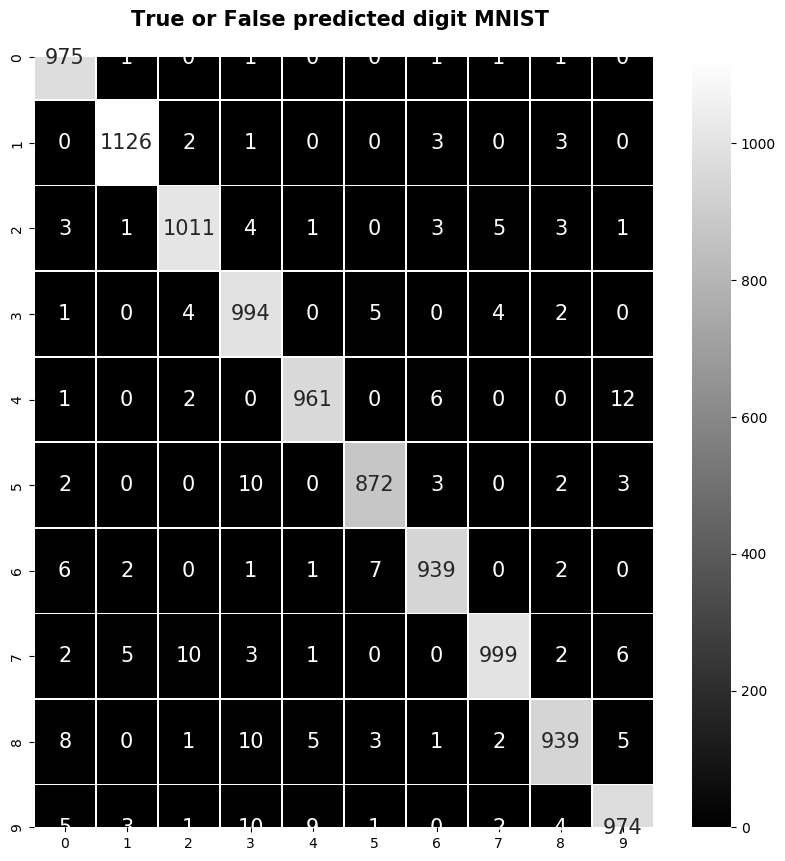

In [30]:
#confusion matrix
con_mat=confusion_matrix(Y_test_digit_eval,Y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST \n',fontweight='bold',fontsize=15)
plt.show()

In [ ]:
#classification report
print(classification_report(Y_test_digit_eval,Y_predicts))

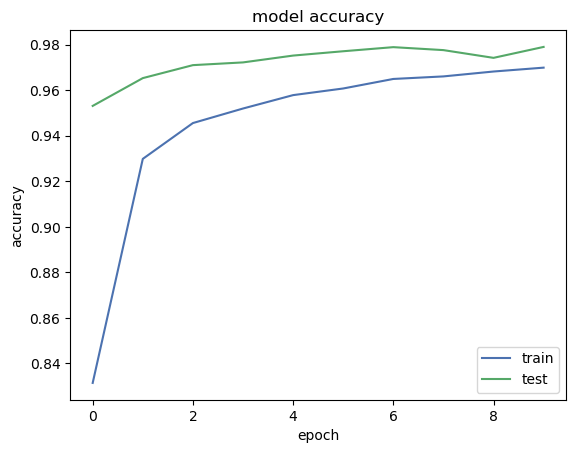

In [43]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

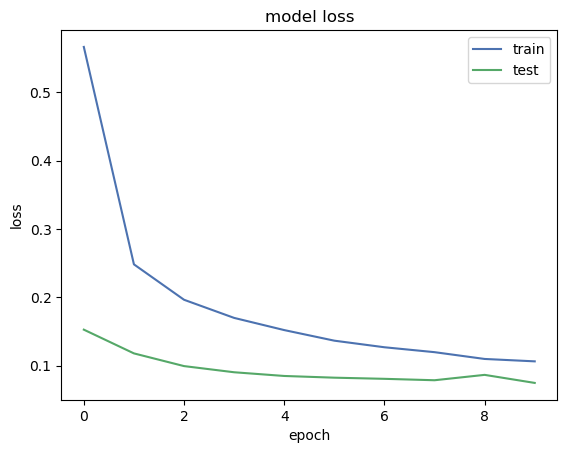

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [57]:
#Reverse engineering for single image
Y_predict_single=model.predict(X_test_digit[[2]])
Y_predicts_single=np.argmax(Y_predict_single,axis=1)
Y_test_digit_eval=np.argmax(Y_test_digit,axis=1)

1/1 [==============================] - 0s 42ms/step


In [53]:
#Names of numbers in the dataset in order
col_names=['zero','one','two','three','four','five','six','seven','eight','nine']

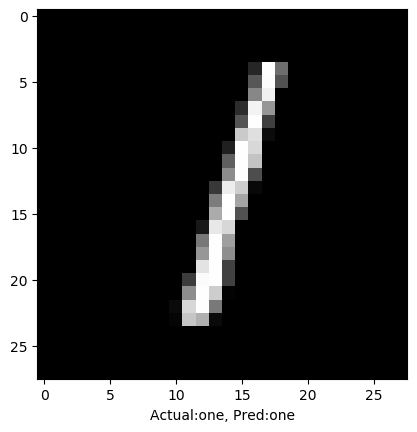

In [59]:
#visualizing the digits
plt.imshow(X_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel("Actual:{}, Pred:{}".format(col_names[np.argmax(Y_test_digit[2])],col_names[Y_predicts_single[0]]))
plt.show()